In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
pd.options.display.max_columns = 1000

In [4]:
df = df.iloc[:, :-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [6]:
df['churn'] = df['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [8]:
c_data = df.copy()

In [9]:
c_data.Gender = c_data.Gender.replace({'F':1,'M':0})
c_data = pd.concat([c_data,pd.get_dummies(c_data['Education_Level']).drop(columns=['Unknown'])],axis=1)
c_data = pd.concat([c_data,pd.get_dummies(c_data['Income_Category']).drop(columns=['Unknown'])],axis=1)
c_data = pd.concat([c_data,pd.get_dummies(c_data['Marital_Status']).drop(columns=['Unknown'])],axis=1)
c_data = pd.concat([c_data,pd.get_dummies(c_data['Card_Category']).drop(columns=['Platinum'])],axis=1)
c_data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM','Attrition_Flag'],inplace=True)

In [10]:
c_data

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,45,0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,49,1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,51,0,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,40,1,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,40,0,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0
10123,41,0,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
10124,44,1,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
10125,30,0,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    c_data.drop('churn', axis=1), c_data['churn'], test_size=0.2, stratify=c_data['churn'], random_state=42
)

In [12]:
from collections import Counter
print("Train class distribution:", Counter(y_train))
print("Test class distribution:", Counter(y_test))

Train class distribution: Counter({0: 6799, 1: 1302})
Test class distribution: Counter({0: 1701, 1: 325})



🔹 Training RandomForest...
📌 RandomForest Metrics:
   - F1-score: 0.8262
   - PR AUC: 0.9388
   - Balanced Accuracy: 0.8645

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.94      0.74      0.83       325

    accuracy                           0.95      2026
   macro avg       0.94      0.86      0.90      2026
weighted avg       0.95      0.95      0.95      2026



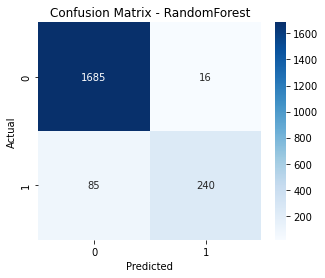


🔹 Training XGBoost...
📌 XGBoost Metrics:
   - F1-score: 0.8767
   - PR AUC: 0.9654
   - Balanced Accuracy: 0.9011

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1701
           1       0.96      0.81      0.88       325

    accuracy                           0.96      2026
   macro avg       0.96      0.90      0.93      2026
weighted avg       0.96      0.96      0.96      2026



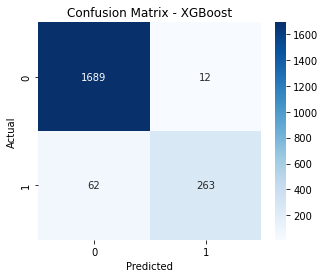


🔹 Training AdaBoost...
📌 AdaBoost Metrics:
   - F1-score: 0.8704
   - PR AUC: 0.9346
   - Balanced Accuracy: 0.9102

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1701
           1       0.91      0.84      0.87       325

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



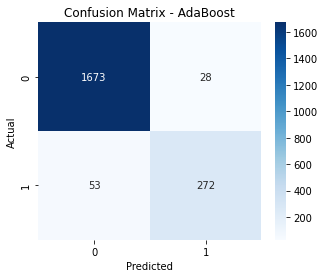


📊 Model Comparison:
               F1-score    PR-AUC  Balanced Accuracy
RandomForest  0.826162  0.938791           0.864528
XGBoost       0.876667  0.965446           0.901088
AdaBoost      0.870400  0.934581           0.910231


In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    f1_score, precision_recall_curve, auc, balanced_accuracy_score, classification_report, confusion_matrix
)
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating train-test data (replace with actual data)
# X_train, X_test, y_train, y_test = your_data_split

# Compute class weights
class_weights = dict(zip([0, 1], compute_class_weight('balanced', classes=[0, 1], y=y_train)))

# Define models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, scale_pos_weight=class_weights[0] / class_weights[1], use_label_encoder=False, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1

    # Compute metrics
    f1 = f1_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    results[name] = {"F1-score": f1, "PR-AUC": pr_auc, "Balanced Accuracy": bal_acc}
    
    print(f"📌 {name} Metrics:")
    print(f"   - F1-score: {f1:.4f}")
    print(f"   - PR AUC: {pr_auc:.4f}")
    print(f"   - Balanced Accuracy: {bal_acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Compare models
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison:\n", results_df)


In [14]:
!pip install shap


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Train final XGBoost model on full dataset
final_model = XGBClassifier(
    n_estimators=100, scale_pos_weight=class_weights[0] / class_weights[1],
    use_label_encoder=False, eval_metric='logloss', random_state=42
)
final_model.fit(X_train, y_train)

# Get predictions
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]  # Probability of churn (class 1)

# Create a DataFrame with predictions
results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Probability": y_pred_proba
})

# Display top 10 predictions
# print("\n📊 Sample Predictions:")
# print(results_df.head(10))

# 📌 Row-level Feature Importance using SHAP
explainer = shap.Explainer(final_model)
shap_values = explainer(X_test)



/Users/pranabpathak/miniconda3/envs/gotham/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# 🔹 Feature contribution for a specific row (e.g., first test instance)
row_idx = 3  # Change this index to inspect different rows
print("\n🔍 Feature Contribution for Row Index", row_idx)
shap_values_df = pd.DataFrame({"Feature": X_test.columns, "SHAP Value": shap_values[row_idx].values})
shap_values_df = shap_values_df.sort_values(by="SHAP Value", ascending=False)
shap_values_df


🔍 Feature Contribution for Row Index 3


,Feature,SHAP Value
8,Total_Revolving_Bal,1.144246
4,Total_Relationship_Count,0.774405
22,$40K - $60K,0.369637
7,Credit_Limit,0.180548
1,Gender,0.086978
0,Customer_Age,0.049257
23,$60K - $80K,0.018024
24,$80K - $120K,0.009101
25,Less than $40K,0.005258
31,Silver,0.002138


In [17]:
X_test.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', '$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
       'Less than $40K', 'Divorced', 'Married', 'Single', 'Blue', 'Gold',
       'Silver'],
      dtype='object')

In [18]:
data_dictionary = {
    "Customer_Age": "Age of the customer",
    "Gender": "Gender of the customer (Male/Female)",
    "Dependent_count": "Number of dependents the customer has",
    "Months_on_book": "Number of months the customer has had the account",
    "Total_Relationship_Count": "Number of accounts the customer holds with the bank",
    "Months_Inactive_12_mon": "Number of months the customer has been inactive in the past 12 months",
    "Contacts_Count_12_mon": "Number of times the customer contacted customer service in the last 12 months",
    "Credit_Limit": "Maximum credit limit assigned to the customer",
    "Total_Revolving_Bal": "Total outstanding balance on the credit card",
    "Avg_Open_To_Buy": "Remaining credit available (Credit_Limit - Total_Revolving_Bal)",
    "Total_Amt_Chng_Q4_Q1": "Percentage change in transaction amount from Q4 to Q1",
    "Total_Trans_Amt": "Total dollar amount of transactions in the last 12 months",
    "Total_Trans_Ct": "Total number of transactions in the last 12 months",
    "Total_Ct_Chng_Q4_Q1": "Percentage change in transaction count from Q4 to Q1",
    "Avg_Utilization_Ratio": "Ratio of credit card balance to credit limit (Total_Revolving_Bal / Credit_Limit)",

    # Education (One-Hot Encoded)
    "College": "Whether the customer has a college education",
    "Doctorate": "Whether the customer has a doctorate degree",
    "Graduate": "Whether the customer has a graduate degree",
    "High School": "Whether the customer has completed high school",
    "Post-Graduate": "Whether the customer has a post-graduate degree",
    "Uneducated": "Whether the customer has no formal education",

    # Income Bracket (One-Hot Encoded)
    "$120K +": "Whether the customer's income is over $120K",
    "$40K - $60K": "Whether the customer's income falls within $40K - $60K",
    "$60K - $80K": "Whether the customer's income falls within $60K - $80K",
    "$80K - $120K": "Whether the customer's income falls within $80K - $120K",
    "Less than $40K": "Whether the customer's income is below $40K",

    # Marital Status (One-Hot Encoded)
    "Divorced": "Whether the customer is divorced",
    "Married": "Whether the customer is married",
    "Single": "Whether the customer is single",

    # Card Type (One-Hot Encoded)
    "Blue": "Whether the customer holds a Blue Card",
    "Gold": "Whether the customer holds a Gold Card",
    "Silver": "Whether the customer holds a Silver Card"
}


In [19]:
# 🔹 Feature contribution for a specific row (e.g., first test instance)
row_idx = 590  # Change this index to inspect different rows
print("\n🔍 Feature Contribution for Row Index", row_idx)
shap_values_df = pd.DataFrame({"Feature": X_test.columns, "SHAP Value": shap_values[row_idx].values})
shap_values_df = shap_values_df.sort_values(by="SHAP Value", ascending=False)
shap_values_df.iloc[:3,:]


🔍 Feature Contribution for Row Index 590


,Feature,SHAP Value
12,Total_Trans_Ct,2.724939
10,Total_Amt_Chng_Q4_Q1,2.124747
13,Total_Ct_Chng_Q4_Q1,1.406671


In [20]:
for i in shap_values_df.iloc[:3,:]['Feature']:
    print(f"Mean value of {i} for active customer: ", X_train[y_train==0][i].mean())

# X_train[y_train==0]['Total_Revolving_Bal'].mean()

Mean value of Total_Trans_Ct for active customer:  68.55008089424915
Mean value of Total_Amt_Chng_Q4_Q1 for active customer:  0.7720129430798647
Mean value of Total_Ct_Chng_Q4_Q1 for active customer:  0.7437895278717459


In [21]:
for i in shap_values_df.iloc[:3,:]['Feature']:
    print(f"Mean value of {i} for churned customer: ", X_train[y_train==1][i].mean())

Mean value of Total_Trans_Ct for churned customer:  44.60675883256528
Mean value of Total_Amt_Chng_Q4_Q1 for churned customer:  0.694873271889401
Mean value of Total_Ct_Chng_Q4_Q1 for churned customer:  0.5545130568356375


In [22]:
X_test.iloc[10,:][[feature for feature in shap_values_df.iloc[:3,:]['Feature']]].to_dict()

{'Total_Trans_Ct': 59.0,
 'Total_Amt_Chng_Q4_Q1': 0.895,
 'Total_Ct_Chng_Q4_Q1': 0.439}

In [23]:
np.where(np.array(y_test.tolist()) == 1)[0]

array([  10,   17,   22,   24,   34,   37,   44,   49,   59,   67,   87,
         89,   99,  111,  126,  127,  128,  139,  140,  141,  147,  153,
        156,  164,  173,  183,  191,  199,  200,  205,  222,  234,  239,
        241,  245,  253,  263,  273,  285,  292,  305,  307,  312,  324,
        336,  338,  339,  352,  354,  365,  370,  374,  375,  378,  381,
        387,  391,  399,  405,  412,  415,  420,  422,  426,  436,  438,
        462,  464,  469,  477,  481,  490,  492,  496,  497,  498,  500,
        523,  526,  528,  534,  538,  545,  550,  556,  558,  573,  575,
        585,  586,  588,  589,  590,  600,  601,  604,  609,  611,  619,
        623,  626,  640,  644,  648,  650,  654,  669,  685,  696,  700,
        706,  709,  739,  747,  751,  754,  758,  759,  771,  785,  795,
        797,  798,  804,  809,  811,  814,  824,  835,  836,  839,  841,
        867,  877,  882,  883,  885,  890,  901,  904,  906,  912,  913,
        916,  920,  930,  931,  940,  951,  962,  9

In [24]:
from crewai import Agent, Task, Crew
import os

openai_api_key = "***"
os.environ["OPENAI_API_KEY"] = openai_api_key
os.environ["OPENAI_MODEL_NAME"] = "gpt-3.5-turbo"

In [25]:
row_idx = 10  # Change this index to inspect different rows
print("\n🔍 Feature Contribution for Row Index", row_idx)
shap_values_df = pd.DataFrame({"Feature": X_test.columns, "SHAP Value": shap_values[row_idx].values})
shap_values_df = shap_values_df.sort_values(by="SHAP Value", ascending=False)
shap_values_df.iloc[:3,:]

num_features = 5

active_customer_behaviour = ""
for i in shap_values_df.iloc[:num_features,:]['Feature']:
    active_customer_behaviour+=f"Mean value of {i} for active customer: {X_train[y_train==0][i].mean()}; "
    
churned_customer_behaviour = ""
feature_dictionary = "Feature Dictionary:: "
for key, value in X_test.iloc[10,:][[feature for feature in shap_values_df.iloc[:num_features,:]['Feature']]].to_dict().items():
    churned_customer_behaviour+=f"Value for {key}: {value}; "
    feature_dictionary += f"{key}: {data_dictionary.get(key)}; "
    



🔍 Feature Contribution for Row Index 10


In [32]:
feature_dictionary

"Feature Dictionary:: Total_Revolving_Bal: Total outstanding balance on the credit card; Total_Ct_Chng_Q4_Q1: Percentage change in transaction count from Q4 to Q1; Total_Amt_Chng_Q4_Q1: Percentage change in transaction amount from Q4 to Q1; $40K - $60K: Whether the customer's income falls within $40K - $60K; Months_on_book: Number of months the customer has had the account; "

In [27]:
customer_analyser = Agent(
    role = "Customer Analyser",
    goal = "Analyse and Compare the churned customer features with that of an average active user",
    backstory = "You are a data analyst specializing in customer research. You will analyse the given information to conclude why a customer might churn.",
    allow_delegation = False,
    verbose = True
)

promotion_generator = Agent(
    role = "Customer Sales Representative",
    goal = "Generate personalised promotions to pervent customer churn and generate an email on the same",
    backstory = "You are a sales representative agent specialised in credit card industry. You will use the information "
                "provided by Customer Analyser to generate the right promotional email for a churning customer. "
                "You will decide what promotional offer will prevent this customer from churning and then generate the email",
    allow_delegation = False,
    verbose = True
)

analyse_task = Task(
    description = (
        "1. This are the top impacting features for churning of a customer with their respective values: {churned_customer_behaviour}."
        "2. This are the values of the same features for an average active customer {active_customer_behaviour}"
        "3. This is the feature dictionary: {feature_dictionary}"
        "Analyse the data and assign low/high or very low/very high to each feature for the churning customer."
    ),
    expected_output="A dictionary with feature: value pairs. For example: some_feature: very high",
    agent=customer_analyser
)

generate_promotion = Task(
    description = (
        "1. The information given to you by Customer Analyser is a dictionary of feature:value pair that tells you what features"
        "are impacting the churning of a credit card customer and the values represent a comparison of the same with an average"
        "active customer. "
        "2. This is the feature dictionary that describes the meaning of the features: {feature_dictionary}"
        "3. Use these information to construct a promotion/offer for the customer to prevent them from churning."
        "4. Generate an email intimating the customer about the promotion. The company is allowed to offer at most 2 offers."
        "Assume a random name for the user in the greetings section. "
        "5. The offer should not contain any technical details, just the offer since this is a promotional campaign"
    ),
    expected_output="A personalised email with subject, body and regards",
    agent=promotion_generator
)

crew = Crew(
    agents=[customer_analyser, promotion_generator],
    tasks=[analyse_task, generate_promotion],
    verbose=True
)

result = crew.kickoff(
inputs={
    "churned_customer_behaviour": churned_customer_behaviour,
    "active_customer_behaviour": active_customer_behaviour,
    "feature_dictionary": feature_dictionary
})

# Agent: Customer Analyser
## Task: 1. This are the top impacting features for churning of a customer with their respective values: Value for Total_Revolving_Bal: 0.0; Value for Total_Ct_Chng_Q4_Q1: 0.439; Value for Total_Amt_Chng_Q4_Q1: 0.895; Value for $40K - $60K: 1.0; Value for Months_on_book: 40.0; .2. This are the values of the same features for an average active customer Mean value of Total_Revolving_Bal for active customer: 1263.0722165024267; Mean value of Total_Ct_Chng_Q4_Q1 for active customer: 0.7437895278717459; Mean value of Total_Amt_Chng_Q4_Q1 for active customer: 0.7720129430798647; Mean value of $40K - $60K for active customer: 0.1809089571995882; Mean value of Months_on_book for active customer: 35.9773496102368; 3. This is the feature dictionary: Feature Dictionary:: Total_Revolving_Bal: Total outstanding balance on the credit card; Total_Ct_Chng_Q4_Q1: Percentage change in transaction count from Q4 to Q1; Total_Amt_Chng_Q4_Q1: Percentage change in transaction amoun

In [29]:
result.raw

"Subject: Exclusive Offer Just For You!\n\nDear valued customer,\n\nWe appreciate your loyalty and would like to show our gratitude by offering you an exclusive promotion to enhance your credit card experience and prevent you from churning.\n\nAs a valued customer, we are pleased to offer you the following exclusive benefits:\n1. Double Reward Points - Earn double the reward points on all your transactions for the next three months.\n2. Personalized Credit Limit Increase - Enjoy a personalized credit limit increase tailored to your spending habits.\n\nWe believe that these offers will provide you with added value and make your credit card experience even more rewarding. Don't miss out on these exclusive benefits created just for you.\n\nThank you for being a part of our credit card family. We look forward to continuing to serve you and meet your financial needs.\n\nWarm regards,\n[Your Name]\nCustomer Sales Representative"